In [153]:
import csv
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [154]:
train_data = numpy.loadtxt("./../data/galaxies_train.csv", delimiter=",", skiprows=1)
test_data = numpy.loadtxt("./../data/galaxies_test.csv", delimiter=",", skiprows=1)

X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10


In [155]:
# NOTE: You are supposed to use this strucuture, i.e., 
# the pre-defined functions and variables. If you 
# have difficulties to keep this structure, you ARE 
# ALLOWED to adapt/change the code structure slightly!
# You might also want to add additional functions or
# variables.

class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        
        predictions = []
        
        # TODO: ADD YOUR CODE HERE
        for j in X:
            distance_array = []
            for i in self.X_train:
                dist = numpy.linalg.norm(i - j)
                distance_array.append(dist)

            # Finds the k nearest neighbours
            # Code snippet found at https://stackoverflow.com/a/34226816
            nearest_index = numpy.argpartition(distance_array, self.n_neighbors)[:self.n_neighbors]
            nearest_neigbours = self.t_train[nearest_index]

            predictions.append(nearest_neigbours[0])
            
        predictions = numpy.array(predictions)
        
        return predictions
    
    # Calculates the RMSE between the true value, t, and the predicted value, tp.
    # This function has been taken from my answer to assignment 1.
    # The assignment was fully made by me and not in any collaborations.
    def RMSE(t, tp):
        N = len(t)
        s = 0
        for i in range(N):
            s += np.linalg.norm((t[i] - tp[i]))**2
        s /= N
        s = s**(0.5)
        return s
    

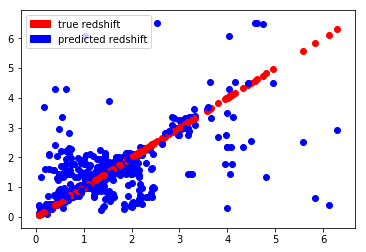

In [156]:
# TODO: ADD YOUR CODE HERE
idk = NearestNeighborRegressor(n_neighbors=3)
idk.fit(X_train, t_train)
predictions = idk.predict(X_test)

# Scatter
for i in range(len(predictions)):
    plt.scatter(t_test[i], t_test[i], c = "red")
    plt.scatter(t_test[i], predictions[i], c = "blue")
    
red_patch = Patch(color = "red", label = "true redshift")
blue_patch = Patch(color = "blue", label = "predicted redshift")
plt.legend(handles = [red_patch, blue_patch], loc = "best")
plt.show()